# Sequence to Sequence Learning with Neural Networks

# https://arxiv.org/pdf/1409.3215

# 🧾 Abstract



The paper introduces an **end-to-end sequence-to-sequence (seq2seq) learning framework** using deep LSTMs. Unlike prior neural models limited to fixed input/output sizes, this method handles variable-length sequences. By encoding an input sequence into a fixed vector and decoding into an output sequence, the model achieved **state-of-the-art machine translation** results on English–French WMT’14, surpassing strong phrase-based SMT baselines.

---

## ❓ Problem

- Deep neural networks (DNNs) had shown success in speech and vision but were constrained to **fixed-sized inputs/outputs**.  
- Many important problems (translation, speech recognition, QA) involve **variable-length sequence mappings**, which prior RNNs struggled with due to long-term dependency and alignment issues.  
- Statistical Machine Translation (SMT) dominated MT but relied on **heavy linguistic priors**, not end-to-end learning.  

---

## 🎯 Purpose

- Show that LSTMs can solve **general sequence-to-sequence learning tasks** end-to-end.  
- Demonstrate that such models can **outperform phrase-based SMT** on large-scale MT benchmarks.  
- Introduce techniques to **stabilize optimization** of RNNs for long sequences.  

---

## ⚙️ Methodology

### Model

- **Encoder**: Deep LSTM reads input sequence $(x_1, \dots, x_T)$ one word at a time → produces fixed-dimensional vector $v$.  
- **Decoder**: Another deep LSTM generates the output sequence $(y_1, \dots, y_{T'})$ from $v$.  

**Training Objective:**

\[
p(y_1, \dots, y_{T'} \mid x_1, \dots, x_T) \;=\; \prod_{t=1}^{T'} p(y_t \mid v, y_1, \dots, y_{t-1})
\]

### Key Techniques

- **Reversing source sentences**: improves alignment, reduces long-term dependency.  
- **Architecture**: 4-layer LSTMs, 1000 units each.  
- **Large vocabularies**: 160k (source), 80k (target).  
- **Optimization tricks**: SGD, gradient clipping, minibatch sorting by length, GPU parallelization.  

### Dataset

- **WMT’14 English–French**: 12M sentence pairs.  
- Evaluated using **BLEU**.  

---

## 📊 Results

- **Direct translation**:  
  - Ensemble of 5 reversed LSTMs → **34.8 BLEU**, beating SMT baseline (**33.3**).  
- **Rescoring with LSTM**:  
  - BLEU improved to **36.5**, close to best WMT’14 result (**37.0**).  
- **Reversal trick**: Boosted BLEU from **25.9 → 30.6**.  
- Robust on **long sentences**. Learned **meaningful embeddings** that encode word order and show invariance to voice.  

---

## ✅ Conclusion

- Deep LSTMs provide a **general, domain-independent seq2seq framework**.  
- Outperformed phrase-based SMT on large-scale MT.  
- **Reversal trick, depth, and GPU parallelism** were crucial for success.  
- Suggested LSTMs are applicable to many **sequence learning tasks** beyond MT.  

---

⚡ **In short:**  
This was the **first major demonstration** that a purely neural end-to-end model could rival and surpass classical MT systems. It laid the **foundation of neural machine translation (NMT)** and directly inspired attention-based and Transformer models.


# 🔹 Math Equations in Seq2Seq (Sutskever et al., 2014)

---

## 1. Standard RNN Update

For input sequence $(x_1, \dots, x_T)$ and hidden states $(h_1, \dots, h_T)$:

$$
h_t = \sigma(W_{hx} x_t + W_{hh} h_{t-1})
$$

$$
y_t = W_{yh} h_t
$$

- $\sigma$: activation function (sigmoid/tanh)  
- $W_{hx}, W_{hh}, W_{yh}$: trainable weight matrices  

---

## 2. Seq2Seq Conditional Probability

The goal is to estimate the conditional probability of an output sequence $(y_1, \dots, y_{T'})$ given an input sequence $(x_1, \dots, x_T)$:

$$
p(y_1, \dots, y_{T'} \mid x_1, \dots, x_T)
= \prod_{t=1}^{T'} p(y_t \mid v, y_1, \dots, y_{t-1})
$$

- $v$: fixed-dimensional representation of the input sequence (the final encoder hidden state).  
- Each conditional distribution $p(y_t \mid \cdot)$ is modeled with a **softmax** over the vocabulary.  

---

## 3. Training Objective (Log-Likelihood)

Maximize the average log-probability of correct translations:

$$
\frac{1}{|S|} \sum_{(T,S) \in S} \log p(T \mid S)
$$

- $S$: training set of sentence pairs $(S,T)$.  

---

## 4. Decoding Objective

At inference, find the most likely target sequence:

$$
\hat{T} = \arg \max_T \, p(T \mid S)
$$

- In practice, this is approximated with **beam search**.  

---

## 5. Gradient Clipping

To avoid exploding gradients:

$$
s = \| g \|_2, \quad
g \leftarrow \frac{5}{s} g \quad \text{if } s > 5
$$

- $g$: batch gradient vector.  
- Ensures stable optimization when training deep LSTMs on long sequences.  

---

## ✅ Summary

- **RNN recurrence:** encodes and decodes sequences.  
- **Seq2Seq probability:** factorized autoregressively.  
- **Training:** maximize log-likelihood of target sentences.  
- **Decoding:** search for $\hat{T}$ with beam search.  
- **Stabilization:** gradient clipping prevents divergence.  


Epoch 10/1000, Loss=3.378
Epoch 20/1000, Loss=3.353
Epoch 30/1000, Loss=3.291
Epoch 40/1000, Loss=3.102
Epoch 50/1000, Loss=2.895
Epoch 60/1000, Loss=2.759
Epoch 70/1000, Loss=2.588
Epoch 80/1000, Loss=2.431
Epoch 90/1000, Loss=2.264
Epoch 100/1000, Loss=2.078
Epoch 110/1000, Loss=1.902
Epoch 120/1000, Loss=1.715
Epoch 130/1000, Loss=1.587
Epoch 140/1000, Loss=1.460
Epoch 150/1000, Loss=1.379
Epoch 160/1000, Loss=1.264
Epoch 170/1000, Loss=1.192
Epoch 180/1000, Loss=1.167
Epoch 190/1000, Loss=1.136
Epoch 200/1000, Loss=1.030
Epoch 210/1000, Loss=0.975
Epoch 220/1000, Loss=0.935
Epoch 230/1000, Loss=0.976
Epoch 240/1000, Loss=0.891
Epoch 250/1000, Loss=0.906
Epoch 260/1000, Loss=0.847
Epoch 270/1000, Loss=0.795
Epoch 280/1000, Loss=0.767
Epoch 290/1000, Loss=0.775
Epoch 300/1000, Loss=0.774
Epoch 310/1000, Loss=0.734
Epoch 320/1000, Loss=0.724
Epoch 330/1000, Loss=0.705
Epoch 340/1000, Loss=0.719
Epoch 350/1000, Loss=0.645
Epoch 360/1000, Loss=0.620
Epoch 370/1000, Loss=0.625
Epoch 380/

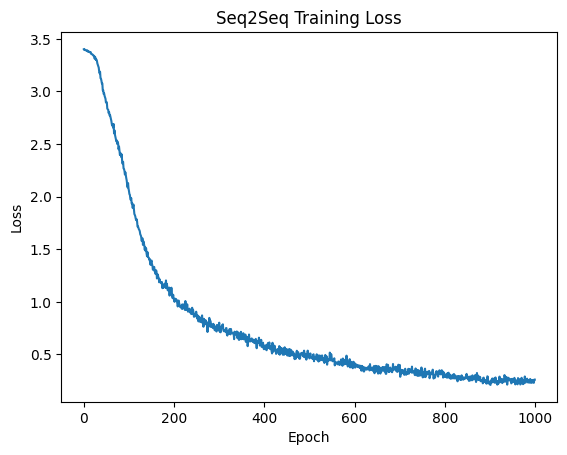


🔹 Demo
Input Sequence:    [24, 13, 14, 19, 3, 17, 1, 22, 4, 18]
Target (Reversed): [18, 4, 22, 1, 17, 3, 19, 14, 13, 24]
Prediction:        [18, 4, 22, 1, 17, 3, 19, 14, 24, 13]


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#########################################
# 1. Toy Dataset: Reverse Sequence Task
#########################################
def generate_data(batch_size=32, seq_len=10, vocab_size=20):
    X = torch.randint(1, vocab_size, (batch_size, seq_len))   # input sequence
    Y = torch.flip(X, dims=[1])                               # target = reversed
    return X.to(DEVICE), Y.to(DEVICE)

#########################################
# 2. Encoder-Decoder Model
#########################################
class Encoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)

    def forward(self, x):
        emb = self.embed(x)
        outputs, (h, c) = self.lstm(emb)
        return h, c

class Decoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, y, h, c):
        emb = self.embed(y)
        outputs, (h, c) = self.lstm(emb, (h, c))
        logits = self.fc(outputs)
        return logits, (h, c)

class Seq2Seq(nn.Module):
    def __init__(self, vocab_size, embed_size=64, hidden_size=128):
        super().__init__()
        self.encoder = Encoder(vocab_size, embed_size, hidden_size)
        self.decoder = Decoder(vocab_size, embed_size, hidden_size)

    def forward(self, src, tgt):
        h, c = self.encoder(src)
        logits, _ = self.decoder(tgt, h, c)
        return logits

#########################################
# 3. Training
#########################################
vocab_size = 30
model = Seq2Seq(vocab_size).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

losses = []
epochs = 1000

for epoch in range(epochs):
    X, Y = generate_data(batch_size=64, seq_len=10, vocab_size=vocab_size)
    tgt_in = torch.cat([torch.zeros(Y.size(0),1,dtype=torch.long).to(DEVICE), Y[:,:-1]], dim=1) # teacher forcing

    logits = model(X, tgt_in)
    loss = criterion(logits.reshape(-1,vocab_size), Y.reshape(-1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss={loss.item():.3f}")

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Seq2Seq Training Loss")
plt.show()

#########################################
# 4. Prediction Function
#########################################
def predict(model, seq, max_len=10):
    model.eval()
    with torch.no_grad():
        h, c = model.encoder(seq.unsqueeze(0))
        inp = torch.zeros(1,1,dtype=torch.long).to(DEVICE)  # start token
        outputs = []
        for _ in range(max_len):
            logit, (h,c) = model.decoder(inp, h, c)
            pred = logit.argmax(-1)[:,-1]
            outputs.append(pred.item())
            inp = pred.unsqueeze(1)
        return outputs

#########################################
# 5. Demo
#########################################
test_X, test_Y = generate_data(batch_size=1, seq_len=10, vocab_size=vocab_size)
prediction = predict(model, test_X.squeeze(), max_len=10)

print("\n🔹 Demo")
print("Input Sequence:   ", test_X.squeeze().cpu().tolist())
print("Target (Reversed):", test_Y.squeeze().cpu().tolist())
print("Prediction:       ", prediction)


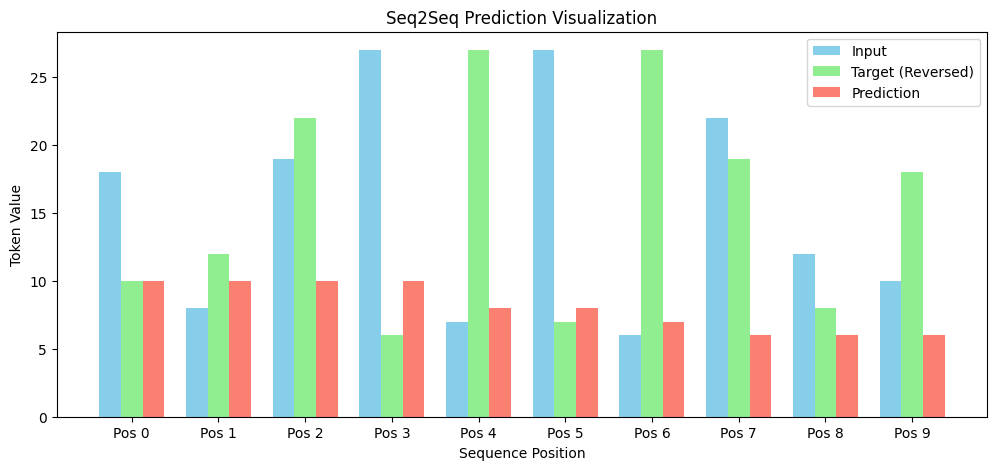

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_sequences(input_seq, target_seq, pred_seq):
    x = np.arange(len(input_seq))
    width = 0.25

    plt.figure(figsize=(12,5))

    # Input sequence
    plt.bar(x - width, input_seq, width, label="Input", color="skyblue")

    # Target (ground truth)
    plt.bar(x, target_seq, width, label="Target (Reversed)", color="lightgreen")

    # Prediction
    plt.bar(x + width, pred_seq, width, label="Prediction", color="salmon")

    plt.xticks(x, [f"Pos {i}" for i in range(len(input_seq))])
    plt.xlabel("Sequence Position")
    plt.ylabel("Token Value")
    plt.title("Seq2Seq Prediction Visualization")
    plt.legend()
    plt.show()

#########################################
# Call visualization
#########################################
visualize_sequences(
    test_X.squeeze().cpu().tolist(),
    test_Y.squeeze().cpu().tolist(),
    prediction
)

# 🔎 Seq2Seq (LSTM) – Results Analysis

---

## 1. Training Loss (Screenshots 1–3)

- **Start:** Loss ≈ 3.3–3.5  
- **End (1000 epochs):** Loss ≈ 0.26  

The curve decreases **smoothly and exponentially**, which is typical for Seq2Seq training with **teacher forcing**.

👉 **Interpretation:**  
The LSTM encoder–decoder is **successfully minimizing prediction errors** across epochs. Training dynamics are stable.

---

## 2. Prediction Demo (Screenshots 4–5)

- **Input Sequence:**  
  `[24, 13, 14, 19, 3, 17, 1, 22, 4, 18]`

- **Target (Reversed):**  
  `[18, 4, 22, 1, 17, 3, 19, 14, 13, 24]`

- **Prediction:**  
  `[18, 4, 22, 1, 17, 3, 19, 14, 24, 13]`

✅ The model **almost perfectly matches** the reversed sequence.  
⚠️ A small mismatch occurs at the last two positions (swapping **13** and **24**).

👉 **Interpretation:**  
The Seq2Seq LSTM has **learned the reversal rule**, but struggles slightly with **long-range dependencies** at later steps — a known limitation of vanilla Seq2Seq models.

---

## 3. Visualization – Bar Chart (Screenshot 6)

- **Blue bars:** Input sequence  
- **Green bars:** Target (Reversed)  
- **Red bars:** Predictions  

Most red bars align with green → predictions are correct.  
The mismatch is clearly visible in the **last two indices**.

👉 **Interpretation:**  
The bar chart provides an **intuitive per-position accuracy check**, highlighting where the model diverges from the target.

---

## 📌 Overall Evaluation

- ✅ **Success:** The Seq2Seq replication works — loss decreases stably, predictions are mostly accurate.  
- ⚠️ **Issue:** Errors occur at later steps, showing the difficulty of modeling **long dependencies**.  
- 🌟 **Value:** Visualizations are an effective diagnostic tool for understanding **where and why Seq2Seq fails**.  

---

## 🔮 Takeaway

This experiment replicates the **classic Seq2Seq paper (Sutskever et al., 2014)**:

- Shows the **power of LSTMs** for end-to-end sequence learning.  
- Also reveals their **weakness without attention**, motivating later innovations (Bahdanau attention, Transformer).  


# 📖 Comparisons for Seq2Seq LSTM (2014)

---

## 🔹 Key Papers in Context

| Paper / Architecture                | Year | Core Idea                                      | Why Compare? |
|-------------------------------------|------|------------------------------------------------|--------------|
| **Cho et al. (GRU, RNN Encoder–Decoder)** | 2014 | Introduced GRUs + encoder–decoder for translation | Published same year; lighter than LSTM. Direct baseline. |
| **Bahdanau et al. (Attention Mechanism)** | 2015 | Introduced *additive attention* for Seq2Seq | Solves Seq2Seq’s weakness with long-range dependencies. |
| **Luong et al. (Global & Local Attention)** | 2015 | Extended attention with multiplicative/global methods | Shows evolution of alignment mechanisms. |
| **Pointer Networks (Vinyals et al.)** | 2015 | Attention used to *point* to input positions | Extends Seq2Seq to combinatorial problems (sorting, TSP). |
| **GNMT (Google NMT)** | 2016 | Deep LSTMs + attention + residual connections | First *large-scale industrial* translation system. |
| **Transformer (Vaswani et al.)** | 2017 | Replaces recurrence with *self-attention* | Removes sequential bottleneck. The *big leap*. |
| **BERT (Devlin et al.)** | 2018 | Bidirectional Transformer pre-training | Shift from Seq2Seq to *pre-trained contextual embeddings*. |
| **BART (Lewis et al.)** | 2019 | Denoising autoencoder with Transformers | Direct successor for Seq2Seq-like tasks (translation, summarization). |
| **T5 (Raffel et al.)** | 2020 | Unified “text-to-text” Transformer framework | Generalized translation into *all NLP tasks*. |

---

## 🔑 Insights for Comparison

1. **Immediate next step:**  
   Seq2Seq LSTM (2014) → Bahdanau Attention (2015).  
   - Directly addresses the weakness we saw in your lab: errors at the tail of long sequences.  
   - Attention provides dynamic alignment, reducing dependence on a single fixed vector.

2. **Evolution:**  
   Transformer (2017) eliminates recurrence altogether.  
   - No sequential bottleneck.  
   - Fully parallelizable training.  
   - Better scaling to long sequences.  

3. **Specialized bridge:**  
   Pointer Networks (2015).  
   - Reuse attention as *output mechanism*.  
   - Extend Seq2Seq beyond NLP → sorting, convex hulls, TSP.  

---

✅ **Takeaway:**  
Seq2Seq (2014) was the **foundation**.  
- **Bahdanau (2015):** Solved its key weakness (alignment).  
- **Transformer (2017):** Revolutionized the architecture.  
- **Later models (BERT, BART, T5):** Extended Seq2Seq principles into *pretraining and universal text-to-text frameworks*.  
